# Japan Used Cars Project

- Predict the price of used cars based on key features such as mark, model, year, mileage, engine capacity, and other specifications.

## Attribute Information

Car's data included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

This dataset includes 10 features:

- **Price:**	Integer	The sale price of the vehicle in the ad

- **Mark:**	    String	The brand of car

- **Model:**	String	model of the vehicle

- **Years:**	Integer	The vehicle registration year

- **Mileage:**	Integer	miles traveled by vehicle

- **Engine_capacity:**	Integer	The measurement of the total volume of the cylinders in the engine

- **Transmission:**	    String	The type of gearbox used by the car

- **Drive:**	String	wheel drive(2wd, 4wd and awd)

- **Hand_drive:**	    String	Left-hand traffic (LHT) and right-hand traffic (RHT)

- **Fuel:**	    String	The type of fuel used by the car( gasoline, diesel, hybrid, lpg and cng)

In [1]:
# Importing all the necessary libraries here.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

import joblib

In [2]:
df = pd.read_csv("Japan_used_cars_datasets.csv")
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


### Exploratory Data Analysis (EDA)

In [3]:
df.shape

(2318, 11)

In [4]:
# Checking Null Values
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [5]:
# Droppig nominal column
df = df.drop(columns=['id'])
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
 6   transmission     2318 non-null   object
 7   drive            2318 non-null   object
 8   hand_drive       2318 non-null   object
 9   fuel             2318 non-null   object
dtypes: int64(4), object(6)
memory usage: 181.2+ KB


### Converting categorical data into numeric format

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lab_enc = LabelEncoder()

In [9]:
df['mark'] = lab_enc.fit_transform(df['mark'])

In [10]:
df['model'] = lab_enc.fit_transform(df['model'])

In [11]:
df['transmission'] = lab_enc.fit_transform(df['transmission'])

In [12]:
df['drive'] = lab_enc.fit_transform(df['drive'])

In [13]:
df['hand_drive'] = lab_enc.fit_transform(df['hand_drive'])

In [14]:
df['fuel'] = lab_enc.fit_transform(df['fuel'])

In [15]:
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,19,143,2003,80000,1240,0,0,2,2
1,110,19,143,2010,53000,1200,0,0,2,2
2,165,19,134,2005,47690,2000,0,0,2,2
3,190,25,29,2008,130661,1990,0,0,2,2
4,190,4,155,2006,66300,660,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
2313,1400,25,242,2009,121000,996,0,0,2,2
2314,1400,25,100,2003,101000,3000,0,0,2,2
2315,1400,23,195,2005,101000,660,1,0,2,2
2316,1400,8,256,2000,170000,660,0,1,2,2


In [16]:
df.describe()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,19.411993,147.894305,2005.972390,100013.194996,1507.010785,0.113891,0.087144,1.992235,1.998274
std,288.673112,7.132919,68.563361,3.698863,52512.478883,549.585170,0.449395,0.289655,0.092583,0.149799
min,80.000000,0.000000,0.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,776.000000,15.000000,104.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,2.000000,2.000000
50%,1000.000000,24.000000,146.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,2.000000,2.000000
75%,1213.000000,25.000000,204.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,2.000000,2.000000
max,1400.000000,27.000000,257.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


In [17]:
df.skew()

price              -0.466780
mark               -0.947938
model              -0.267060
year               -0.845917
mileage             3.089142
engine_capacity     4.038892
transmission        3.820441
drive               3.193137
hand_drive        -12.811470
fuel                4.146744
dtype: float64

### Distribution

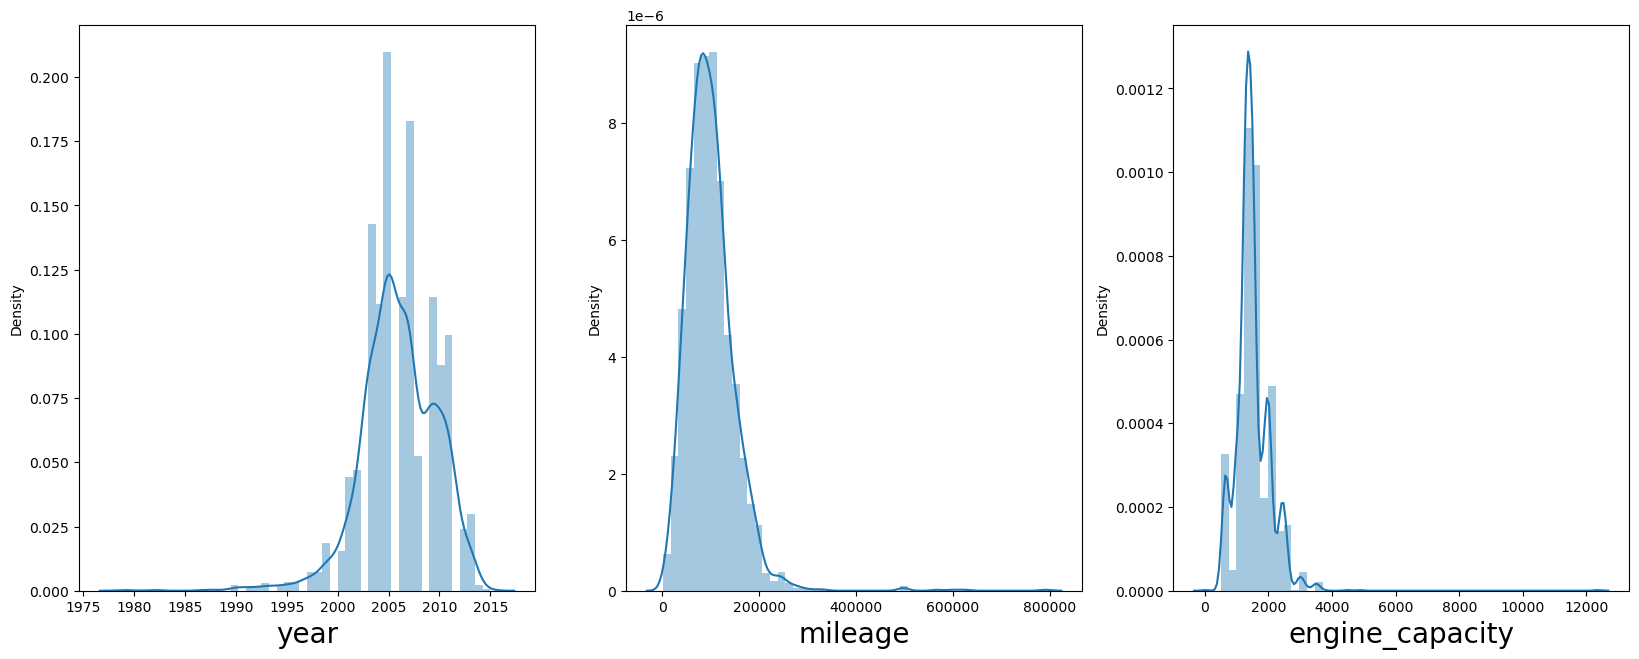

In [18]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25))
plotnumber = 1
for column in df[['year','mileage','engine_capacity']]:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.show()

Outliers are there, need to deal with it

In [19]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

### Outlier detection formula

**higher side** ==> **Q3 + (1.5 * IQR)**

**lower side** ==> **Q1 - (1.5 * IQR)**

#### Higher side

In [20]:
index = np.where(df['mileage']>(q3.mileage+(1.5*iqr.mileage)))
df = df.drop(df.index[index])

df.reset_index()
df.shape

(2272, 10)

In [21]:
index = np.where(df['engine_capacity']>(q3.engine_capacity+(1.5*iqr.engine_capacity)))
df=df.drop(df.index[index])

df.reset_index()
df.shape

(2232, 10)

#### Lower side

In [22]:
index = np.where(df['year']<(q3.year-(1.5*iqr.year)))
df = df.drop(df.index[index])

df.reset_index()
df.shape

(2052, 10)

In [23]:
index = np.where(df['mileage']<(q3.mileage-(1.5*iqr.mileage)))
df = df.drop(df.index[index])

df.reset_index()
df.shape

(1914, 10)

In [24]:
index = np.where(df['engine_capacity']<(q3.engine_capacity-(1.5*iqr.engine_capacity)))
df = df.drop(df.index[index])

df.reset_index()
df.shape

(1625, 10)

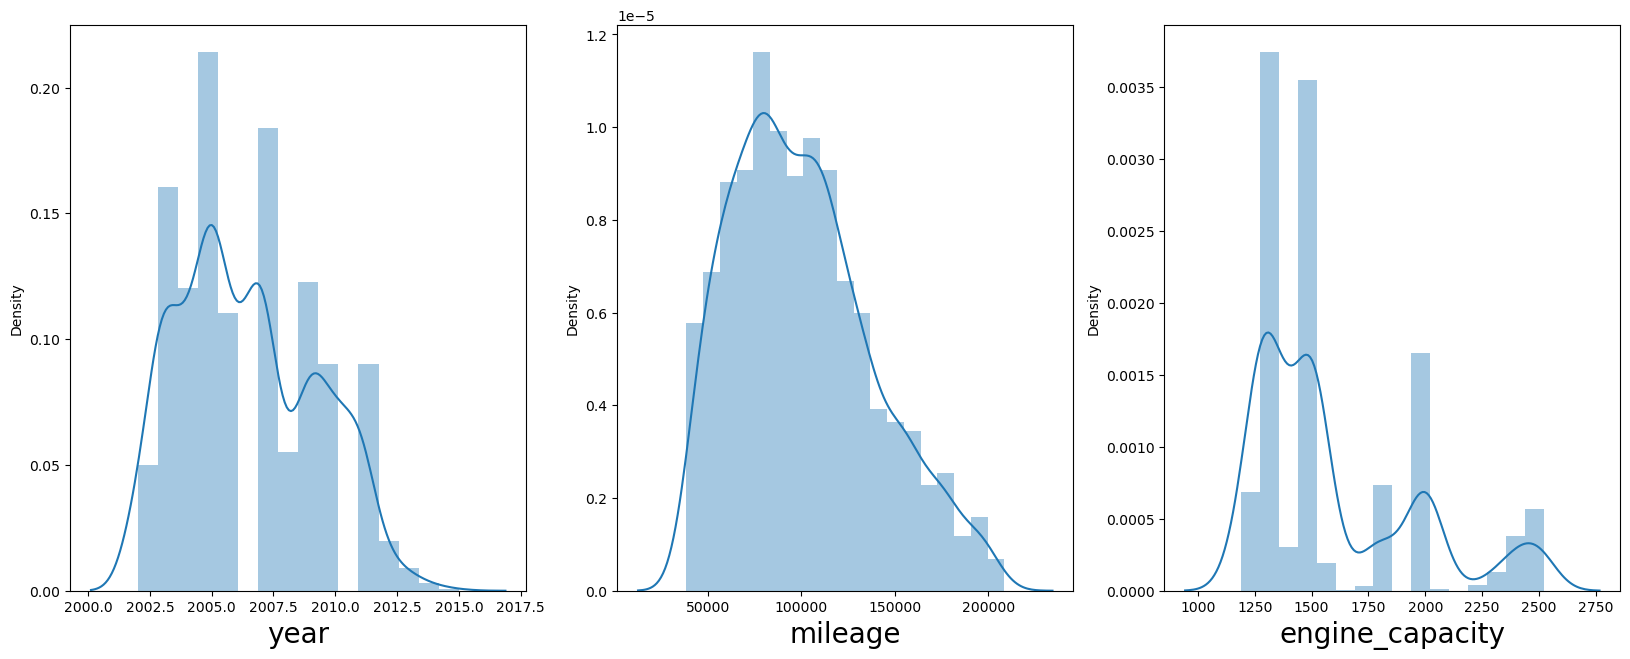

In [25]:
# Checking the distribution after dealing with outliers

plt.figure(figsize = (20,25),facecolor='white')
plotnumber = 1
for column in df[['year','mileage','engine_capacity']]:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

### Multicollinearity problem

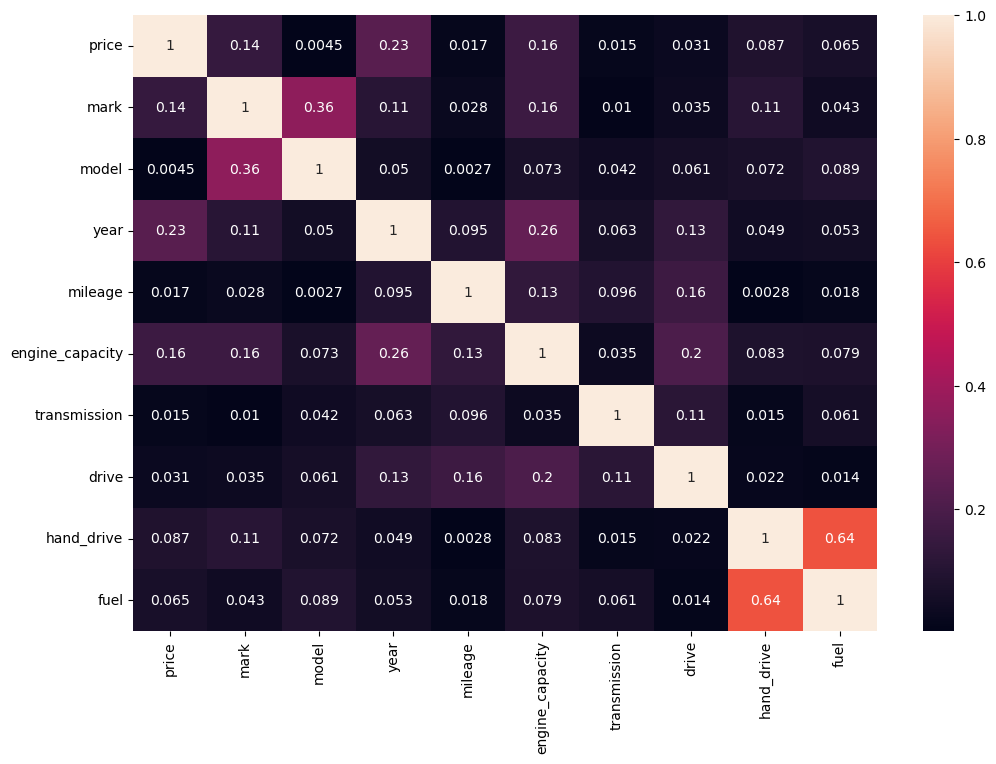

In [26]:
df_corr = df.corr().abs()
plt.figure(figsize = (12,8))
sns.heatmap(df_corr, annot= True, annot_kws= {'size' : 10})
plt.show()

No multicollinearity found. We can take all.

In [27]:
x = df.drop(columns = 'price')
y = df.price

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Splitting into test and train data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [30]:
# Regression model function

def regression(model, x_train, x_test, y_train, y_test):
    
    # Training the model
    model.fit(x_train, y_train)
    
    # How model is performing
    print(f" Score = {model.score(x_test,y_test)* 100:.2f}%")    

In [31]:
# Support Vector Regressor

svr = SVR()
regression(svr, x_train, x_test, y_train, y_test)

 Score = -3.15%


In [32]:
# Decision Tree Regressor

dt = DecisionTreeRegressor()
regression(dt, x_train, x_test, y_train, y_test)

 Score = -10.00%


In [33]:
# Random Forest Classifier

rf = RandomForestRegressor()
regression(rf, x_train, x_test, y_train, y_test)

 Score = 33.04%


In [34]:
# Linear Regression

lm=LinearRegression()
regression(lm, x_train, x_test, y_train, y_test)

 Score = 12.85%


### We are getting best result from RandomForestRegressor model with score of 33%